<table style="width:100%; border: none;">
    <tr>
        <td colspan="3" style="text-align:center; border: none;">
            <img src="assets/banner.svg" alt="Banner Image" style="width:100%;">
        </td>
    </tr>
    <!-- Add other rows and cells below if needed -->
</table>


In [3]:
from utils import *
import folium
from folium.features import CustomIcon

In [6]:
# Create a map centered at a specific location (latitude, longitude)
m = folium.Map(location=[48.8566, 2.3522], zoom_start=6)

# Loop through the dictionary of capital coordinates
for key in capitals_coordinates.keys():
    # Get the latitude and longitude of the current capital
    lat = capitals_coordinates[key][0]
    lon = capitals_coordinates[key][1]
    
    # Path to the plot image
    image_path = os.path.join("results/", f"{key}.svg")
    
    # Create HTML for the popup with the plot image
    popup_html = f'<img src="{image_path}" alt="DT-Climate Forecast {key}" width="1000" height="500">'
    
    # Create a Popup with the HTML
    popup = folium.Popup(popup_html,max_width=1000)
    
    # Create a simple Folium icon
    icon = folium.Icon(prefix="fa",icon='circle',color='darkblue')
    
    # Add a marker with the popup and simple icon to the map
    folium.Marker(location=[lat, lon], popup=popup, icon=icon).add_to(m)

# Save the map to an HTML file
m.save('map.html')

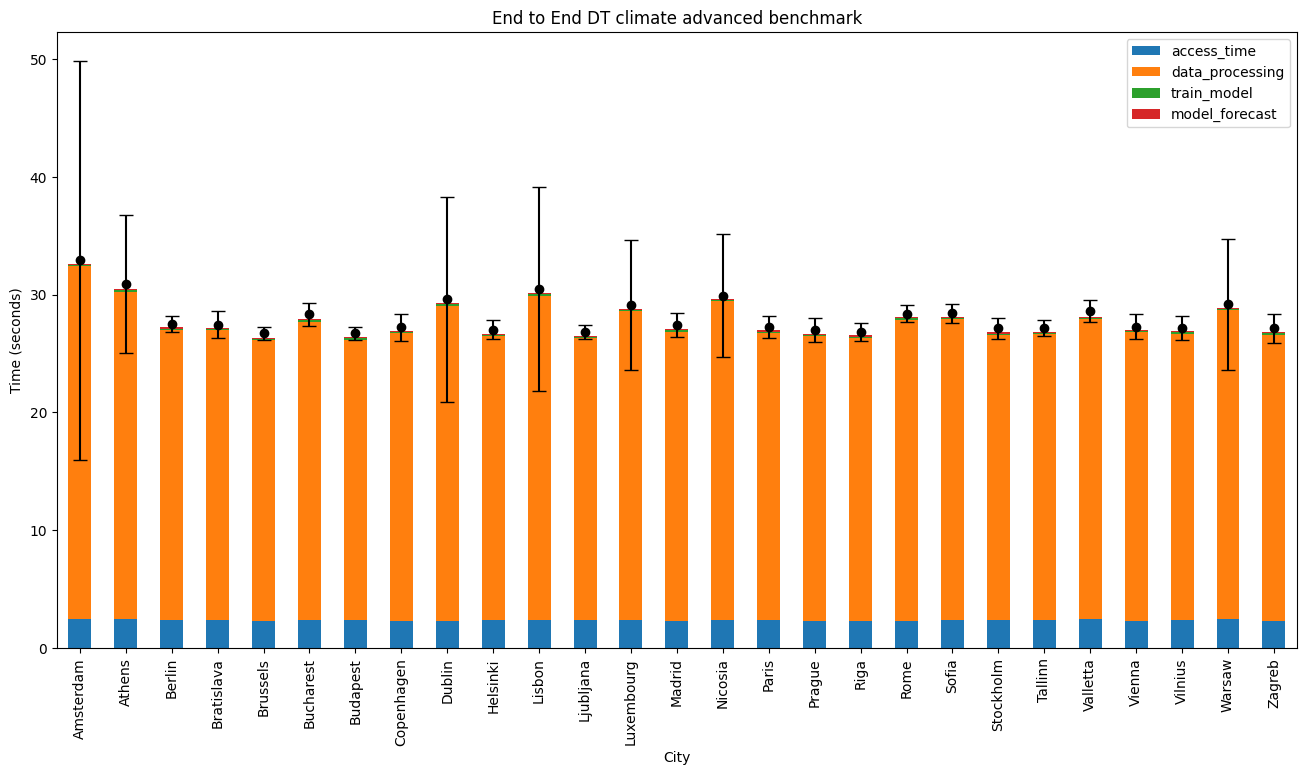

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_json("/home/ubuntu/project/Destination-Earth-Climate-Data-Visualization/results/benchmark_results_standard.json")
df = df.T 
df["City"] = df.index
# Extract error bars
errors = df['end_to_end_std']
# Plotting the stacked bar chart without 'end_to_end'
df_plot = df.drop(columns=['end_to_end', 'end_to_end_std', 'City'])
df_plot.plot(kind='bar', stacked=True, figsize=(16, 8))
# Overlay 'end_to_end' with error bars
x = np.arange(len(df))
plt.errorbar(x, df['end_to_end'], yerr=errors, fmt='o', color='black', capsize=5)
# Set labels and title
plt.ylabel('Time (seconds)')
plt.xlabel("City")
plt.title('End to End DT climate advanced benchmark')
# Adding city names as x-tick labels
# Display legend
plt.legend(loc='upper right')
plt.savefig("results/Benchmark_standard_barplot_v2.svg")      
    